In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.size']      = 14.0
plt.rcParams['legend.fontsize'] = 12.0
plt.rcParams['figure.dpi']     = 96
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.subplot.right'] = 0.8
plt.rcParams['figure.subplot.top'] = 0.95
plt.rcParams['figure.subplot.left'] = 0.08

In [3]:
D20 = np.loadtxt('D20cm.csv',delimiter=',')
D18 = np.loadtxt('D18cm.csv',delimiter=',')
D15 = np.loadtxt('D15cm.csv',delimiter=',')
NPSH = np.loadtxt('NPSHR.csv',delimiter=',')

In [4]:
order = 3
pp_D20 = np.polyfit(D20[:,0],D20[:,1],order)
pp_D18 = np.polyfit(D18[:,0],D18[:,1],order)
pp_D15 = np.polyfit(D15[:,0],D15[:,1],order)
pp_N = np.polyfit(NPSH[:,0],NPSH[:,1]-0.1,order)

In [5]:
def calc_ha(pp,order,q):
    ha = np.zeros_like(q)
    for n in range(order+1):
        ha += pp[n]*q**(order-n)
    return ha

In [6]:
qv = np.linspace(0,1000)

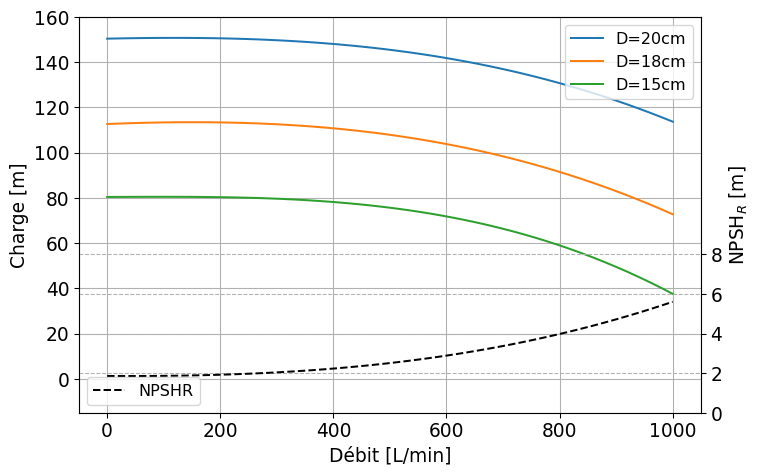

In [14]:
fig = plt.figure()
plt.plot(qv,calc_ha(pp_D20,order,qv),label='D=20cm')
plt.plot(qv,calc_ha(pp_D18,order,qv),label='D=18cm')
plt.plot(qv,calc_ha(pp_D15,order,qv),label='D=15cm')
plt.xlabel('Débit [L/min]')
plt.ylabel('Charge [m]')
plt.ylim(-15,160)
plt.grid()
plt.legend(loc=1)
ax1 = fig.gca()
ax2 = ax1.twinx()
ax2.plot(qv,calc_ha(pp_N,order,qv),label='NPSHR',color='black',linestyle='--')
ax2.set_ylim(0,20)
ax2.set_yticks(np.linspace(0.,8,5))
ax2.set_ylabel(r'NPSH$_R$ [m]')
ax2.legend(loc=3)
ax2.grid(linestyle='--')

In [15]:
20/(2*9.8)*(4*800e-3/60/(np.pi*0.1**2))**2

2.940841611387582

In [17]:
(101.3e3-19.92e3)/9.642e3 -2.940841611387582

5.499316032254815

In [19]:
7-4

3